# SARK-110 Smith Chart example

Simple Jupyter notebook example for interacting with the SARK-110 Antenna Analyzer.

Please ensure that the analyzer is connected to the computer using the USB cable and in Computer Control mode.

In [43]:
from sark110 import *
from skrf import Network

Enter frequency limits:

In [44]:
fr_start = 10000000   # Frequency start in Hz
fr_stop =  20000000   # Frequency stop in Hz
points = 100          # Number of points

## Utility functions

In [45]:
def z2vswr(r, x):
    gamma = math.sqrt((r - 50) ** 2 + x ** 2) / math.sqrt((r + 50) ** 2 + x ** 2)
    if gamma > 0.980197824:
        return 99.999
    swr = (1 + gamma) / (1 - gamma)
    return swr

def z2mag(r, x):
    return (math.sqrt(r ** 2 + x ** 2))

def z2gamma(rs, xs, z0 = 50 + 0j):
    z = complex(rs, xs)
    return (z - z0) / (z + z0)

## Connect to the device

In [46]:
sark110 = Sark110()
sark110.open()
sark110.connect()
if not sark110.is_connected:
    print("Device not connected")
    exit(-1)
else:
    print("Device connected")

Device connected


In [47]:
sark110.buzzer()
print(sark110.fw_protocol, sark110.fw_version)

2566 1.5


## Acquire and plot the data

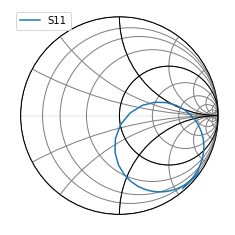

In [48]:
y = []
x = []
rs = [0]
xs = [0]
for freq in range(int(fr_start), int(fr_stop), int((fr_stop-fr_start)/(points-1))):  
    sark110.measure(freq, rs, xs)
    x.append(freq)
    y.append(z2gamma(rs[0][0], xs[0][0]))

ring_slot = Network(frequency=x, s=y, z0=50)
ring_slot.plot_s_smith()

In [49]:
sark110.close()